## Experiment 1 Pre-Processing

- subject 1(female/neutral)

- subject 2(male/neutral)

- subject 3(female/sad)

- subject 4(male/sad)

#### Import Packages

In [1]:
import mne
from mne.preprocessing import ICA, create_eog_epochs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

#### Take a Look At Experiment 1 Logistics

In [2]:
experiment_1_logistics = pd.read_csv("participants.tsv",  sep='\t')
experiment_1_logistics.head(4)

participant_id MoodManipulationGroup     sex  age  BDI
0        sub-001               Neutral  Female   21   10
1        sub-002               Neutral    Male   26   11
2        sub-003                   Sad  Female   36   11
3        sub-004                   Sad    Male   33    4

## Subject 1 (Female/Neutral Stimulus)

In [3]:
subj1 = mne.io.read_raw_eeglab("sub-001-eeg-sub-001_task-PST_eeg.set", preload = True)
df = subj1.to_data_frame()

Reading /home/cmcmanig/FINALPROJECT/sub-001-eeg-sub-001_task-PST_eeg.fdt
Reading 0 ... 754924  =      0.000 ...  1509.848 secs...


/tmp/ipykernel_4061/3126423245.py:1: RuntimeWarning: Data file name in EEG.data (sub-001_task-PST_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-001-eeg-sub-001_task-PST_eeg.fdt).
  subj1 = mne.io.read_raw_eeglab("sub-001-eeg-sub-001_task-PST_eeg.set", preload = True)
/tmp/ipykernel_4061/3126423245.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  subj1 = mne.io.read_raw_eeglab("sub-001-eeg-sub-001_task-PST_eeg.set", preload = True)


In [4]:
df.head()

time          Fp1           Fz            F3           F7          FT9  \
0  0.000 -2517.822266  8277.929688  10931.933594  6093.945312  5324.902344   
1  0.002 -2516.406250  8279.687500  10931.933594  6087.109375  5326.464844   
2  0.004 -2516.406250  8281.884766  10938.134766  6086.279297  5335.937500   
3  0.006 -2516.552734  8280.322266  10933.447266  6088.232422  5332.031250   
4  0.008 -2512.988281  8281.054688  10933.056641  6092.529297  5328.613281   

            FC5          FC1           C3            T7  ...           C2  \
0  33134.714844  5345.117188  6895.947266  11763.232422  ...  3279.541016   
1  33143.894531  5346.386719  6899.804687  11761.474609  ...  3279.492187   
2  33142.917969  5347.949219  6899.755859  11762.158203  ...  3280.517578   
3  33130.320312  5346.386719  6894.824219  11765.625000  ...  3279.150391   
4  33122.167969  5347.314453  6893.701172  11770.019531  ...  3278.906250   

           FC4          FT8          F6          F2          AF4          AF8  \
0 -9313.378906  4911.621094 -576.367188  674.853516  4801.904297 -1931.542969   
1 -9315.673828  4910.449219 -579.150391  673.925781  4807.617188 -1934.765625   
2 -9315.234375  4919.238281 -574.658203  674.853516  4819.775391 -1933.740234   
3 -9315.136719  4916.748047 -572.314453  675.146484  4798.974609 -1939.990234   
4 -9312.890625  4913.818359 -564.501953  676.318359  4791.308594 -1939.501953   

            EOG         EKG  AudioOutput  
0  12462.138672  2334804.25  1947.879761  
1  12428.760742  2393273.75  1402.497314  
2  12343.526367  2464593.75  1501.142944  
3  12350.082031  2508445.50   958.442688  
4  12445.151367  2502874.25  1991.689209  

[5 rows x 67 columns]

#### Look at Recording Logistics

In [5]:
num_chan = subj1.info['nchan']
srate = subj1.info['sfreq']
num_time_pnts = subj1.n_times
duration = subj1.n_times / srate

print('Number of channels:', num_chan)
print('Sampling rate:', srate, "Hz")
print('Numer of time points:', num_time_pnts)
print('Duration:', duration, "seconds")

Number of channels: 66
Sampling rate: 500.0 Hz
Numer of time points: 754925
Duration: 1509.85 seconds


In [6]:
subj1.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

#### Take a Look at Channels and Change Type of non-EEG channels

In [7]:
# need to change channel type of non-EEG channels
subj1.info['ch_names']

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'EOG',
 'EKG',
 'AudioOutput']

In [8]:
channel_change = { 'EOG' : 'misc',
                   'EKG' : 'misc',
           'AudioOutput' : 'misc' }

subj1.set_channel_types(channel_change)

/tmp/ipykernel_4061/3653936530.py:5: RuntimeWarning: The unit for channel(s) AudioOutput, EKG, EOG has changed from V to NA.
  subj1.set_channel_types(channel_change)


<RawEEGLAB | sub-001-eeg-sub-001_task-PST_eeg.fdt, 66 x 754925 (1509.8 s), ~380.2 MB, data loaded>

In [9]:
subj1.set_montage('standard_1020', match_case = False)

<RawEEGLAB | sub-001-eeg-sub-001_task-PST_eeg.fdt, 66 x 754925 (1509.8 s), ~380.2 MB, data loaded>

### Plot the Raw Data and Power Spectrum

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


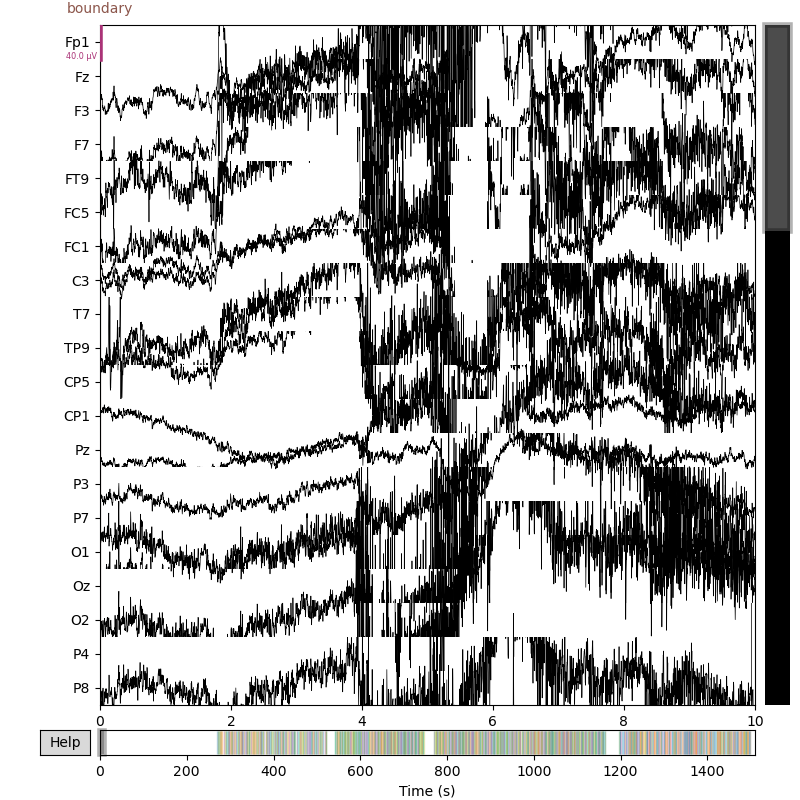

In [10]:
# plot raw data

#raw.plot()
mne.viz.plot_raw(subj1, show = False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>


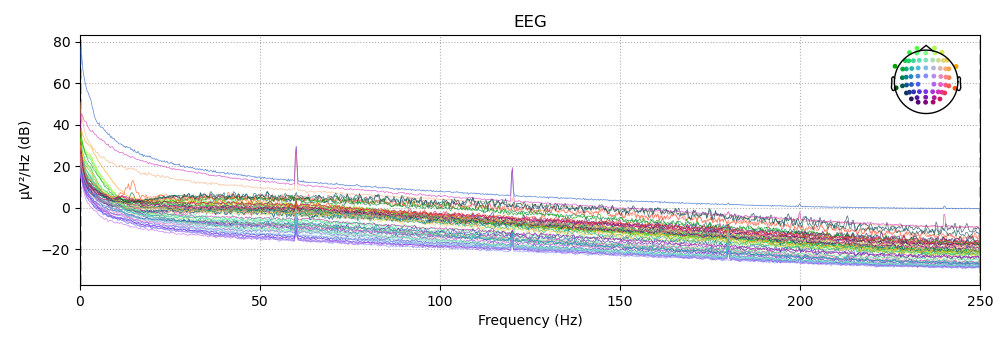

In [11]:
# plot power spectrum
subj1.plot_psd(show = False)

### Re-referencing Subject 1

In [12]:
# re-reference
subj1.set_eeg_reference(ref_channels = 'average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | sub-001-eeg-sub-001_task-PST_eeg.fdt, 66 x 754925 (1509.8 s), ~380.2 MB, data loaded>

<IPython.core.display.Javascript object>


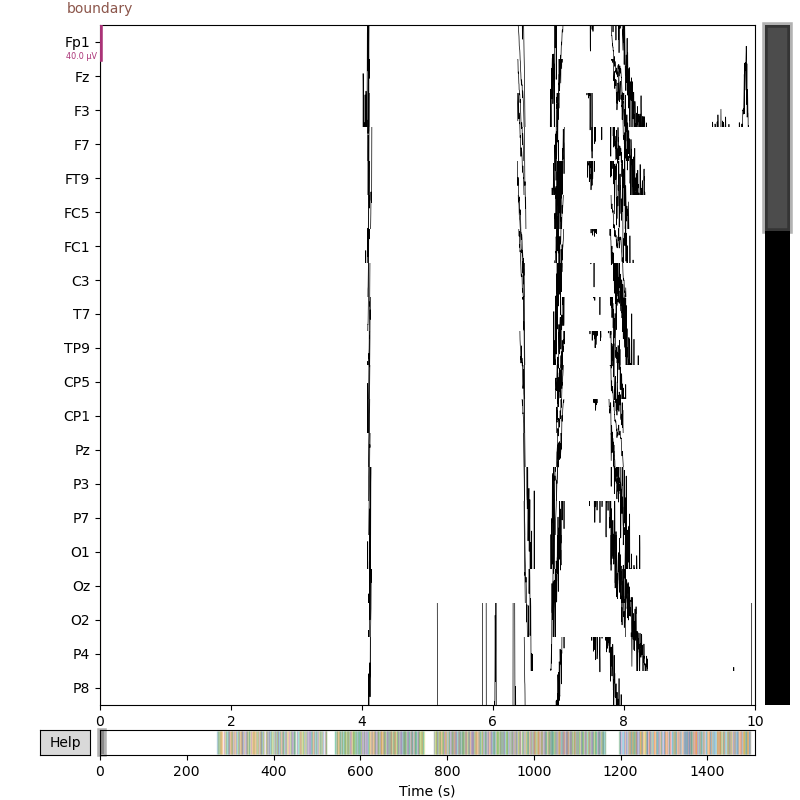

In [13]:
#raw.plot()
mne.viz.plot_raw(subj1, show = False)

### Filtering Subject 1

In [14]:
subj1 = subj1.filter(0.5, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.8s finished


<IPython.core.display.Javascript object>


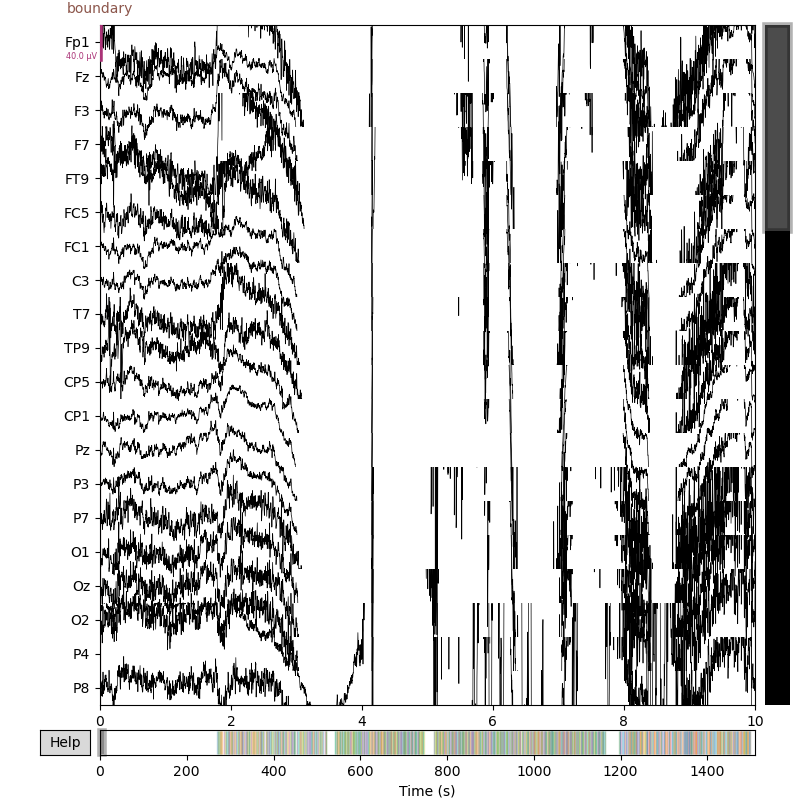

In [15]:
#raw.plot()
mne.viz.plot_raw(subj1, show = False)

## Subject 2 (Male/Neutral Stimulus)

In [16]:
subj2 = mne.io.read_raw_eeglab("sub-002-eeg-sub-002_task-PST_eeg.set", preload = True)
df2 = subj2.to_data_frame()

Reading /home/cmcmanig/FINALPROJECT/sub-002-eeg-sub-002_task-PST_eeg.fdt
Reading 0 ... 711649  =      0.000 ...  1423.298 secs...


/tmp/ipykernel_4061/3184058491.py:1: RuntimeWarning: Data file name in EEG.data (sub-002_task-PST_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-002-eeg-sub-002_task-PST_eeg.fdt).
  subj2 = mne.io.read_raw_eeglab("sub-002-eeg-sub-002_task-PST_eeg.set", preload = True)
/tmp/ipykernel_4061/3184058491.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  subj2 = mne.io.read_raw_eeglab("sub-002-eeg-sub-002_task-PST_eeg.set", preload = True)


In [17]:
df2.head()

time          Fp1           Fz           F3           F7          FT9  \
0  0.000  8236.914062  6354.248047 -4890.576172 -3798.535156  3923.583984   
1  0.002  8250.878906  6357.080078 -4898.681641 -3859.912109  3935.498047   
2  0.004  8236.816406  6351.611328 -4895.751953 -3813.427734  3862.841797   
3  0.006  8209.472656  6343.408203 -4897.412109 -3791.113281  3927.294922   
4  0.008  8216.357422  6339.697266 -4910.986328 -3834.521484  3930.468750   

           FC5          FC1           C3           T7  ...           C2  \
0  2251.513672  2748.974609  2091.650391 -9330.468750  ...  3876.904297   
1  2222.363281  2744.970703  2085.595703 -9366.308594  ...  3876.513672   
2  2233.349609  2744.531250  2090.039062 -9357.958984  ...  3875.537109   
3  2233.007812  2746.435547  2094.189453 -9338.378906  ...  3873.339844   
4  2201.025391  2739.208984  2085.302734 -9379.785156  ...  3874.853516   

           FC4           FT8           F6           F2          AF4  \
0 -4536.132812 -16221.679688 -5243.212891  2729.492188 -4505.322266   
1 -4519.775391 -16230.810547 -5205.078125  2740.380859 -4488.867188   
2 -4511.572266 -16351.806641 -5215.234375  2735.205078 -4503.857422   
3 -4529.101562 -16345.263672 -5228.417969  2723.974609 -4520.800781   
4 -4516.259766 -16357.177734 -5221.875000  2726.855469 -4527.880859   

           AF8           EOG           EKG  AudioOutput  
0  1793.847656  12314.617188  454191.28125  4537.403809  
1  1813.525391  12332.499023  454244.62500  4221.796875  
2  1774.316406  12305.081055  454918.15625  2055.466064  
3  1758.398438  12012.124023  456227.96875  1876.056152  
4  1751.171875  11951.029297  456358.50000  2605.020996  

[5 rows x 67 columns]

#### Look at Recording Logistics

In [18]:
num_chan = subj2.info['nchan']
srate = subj2.info['sfreq']
num_time_pnts = subj2.n_times
duration = subj2.n_times / srate

print('Number of channels:', num_chan)
print('Sampling rate:', srate, "Hz")
print('Numer of time points:', num_time_pnts)
print('Duration:', duration, "seconds")

Number of channels: 66
Sampling rate: 500.0 Hz
Numer of time points: 711650
Duration: 1423.3 seconds


In [19]:
subj2.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

#### Take a Look at Channels and Change Type of non-EEG channels

In [20]:
# need to change channel type of non-EEG channels
subj2.info['ch_names']

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'EOG',
 'EKG',
 'AudioOutput']

In [21]:
channel_change = { 'EOG' : 'misc',
                   'EKG' : 'misc',
           'AudioOutput' : 'misc' }

subj2.set_channel_types(channel_change)

/tmp/ipykernel_4061/751643191.py:5: RuntimeWarning: The unit for channel(s) AudioOutput, EKG, EOG has changed from V to NA.
  subj2.set_channel_types(channel_change)


<RawEEGLAB | sub-002-eeg-sub-002_task-PST_eeg.fdt, 66 x 711650 (1423.3 s), ~358.4 MB, data loaded>

In [22]:
subj2.set_montage('standard_1020', match_case = False)

<RawEEGLAB | sub-002-eeg-sub-002_task-PST_eeg.fdt, 66 x 711650 (1423.3 s), ~358.4 MB, data loaded>

### Plot the Raw Data and Power Spectrum

<IPython.core.display.Javascript object>


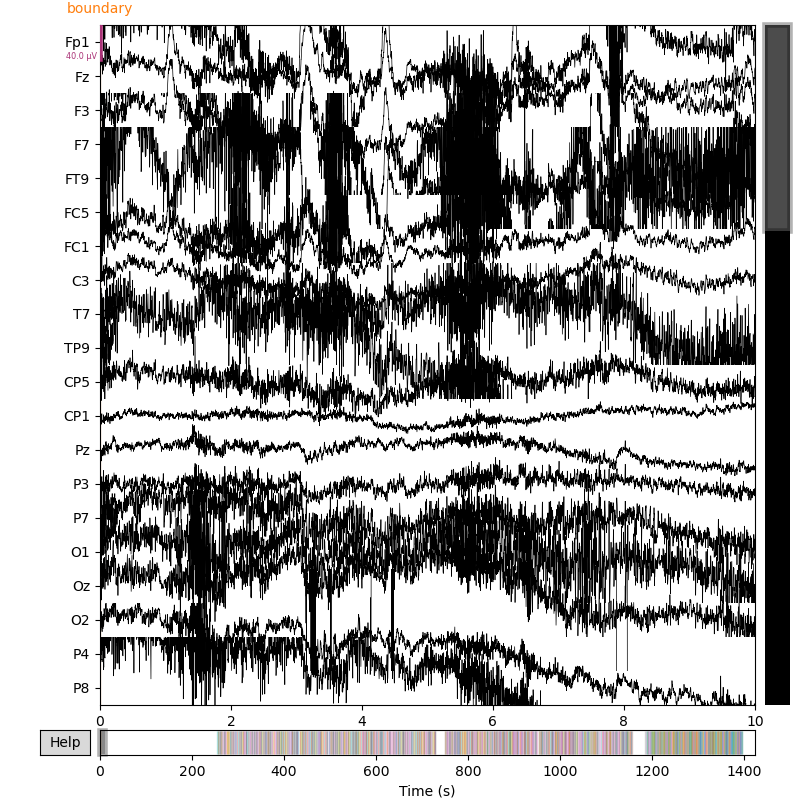

In [23]:
# plot raw data

#raw.plot()
mne.viz.plot_raw(subj2, show = False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>


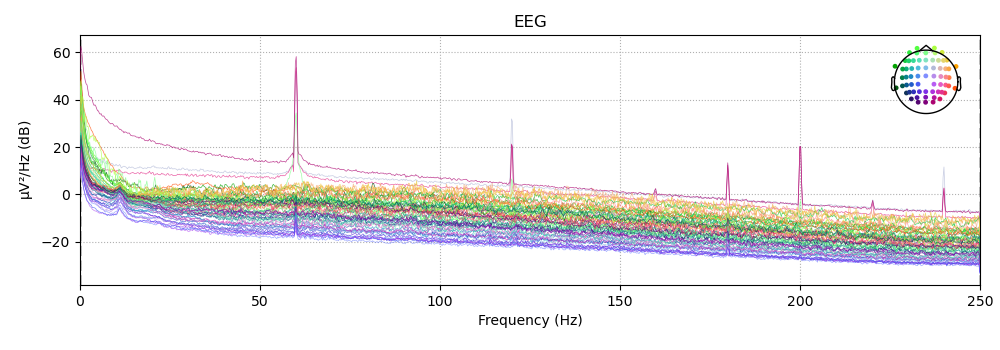

In [24]:
# plot power spectrum
subj2.plot_psd(show = False)

### Re-referencing Subject 2

In [25]:
# re-reference
subj2.set_eeg_reference(ref_channels = 'average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | sub-002-eeg-sub-002_task-PST_eeg.fdt, 66 x 711650 (1423.3 s), ~358.4 MB, data loaded>

<IPython.core.display.Javascript object>


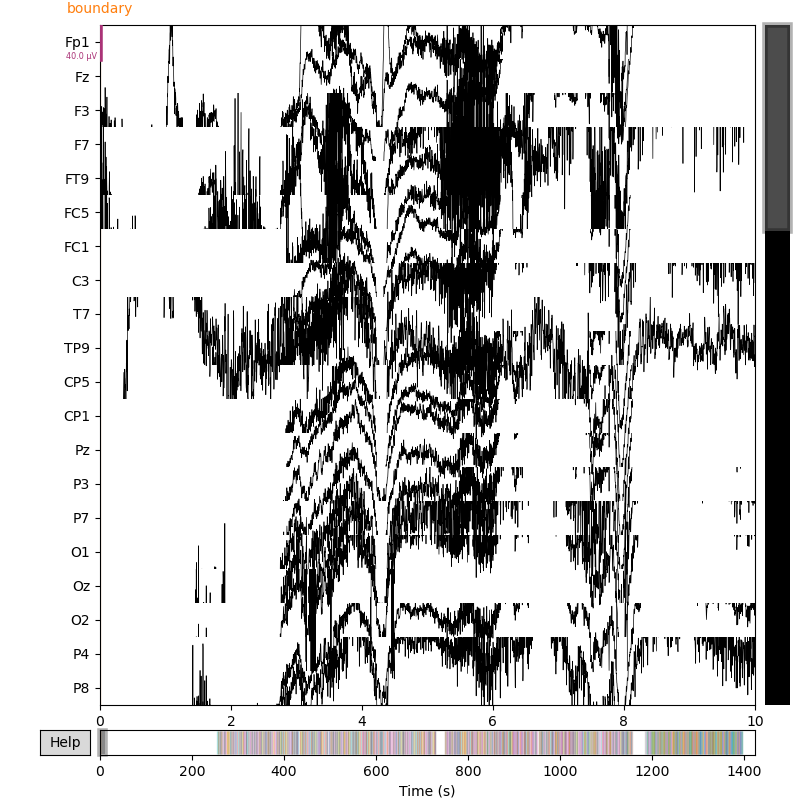

In [26]:
#raw.plot()
mne.viz.plot_raw(subj2, show = False)

### Filtering Subject 2

In [27]:
subj2 = subj2.filter(0.5, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.5s finished


<IPython.core.display.Javascript object>


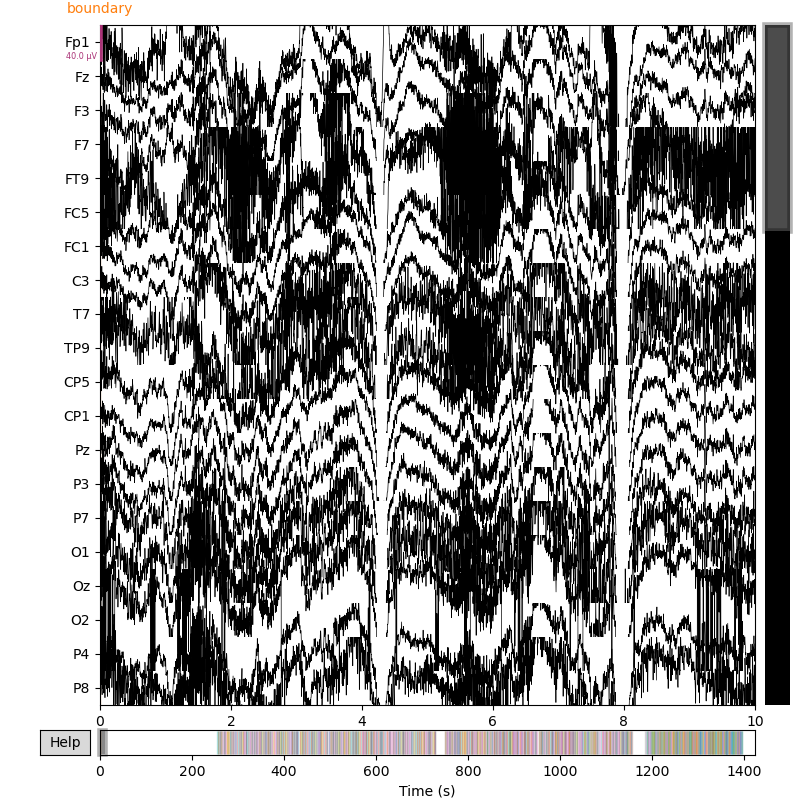

In [28]:
#raw.plot()
mne.viz.plot_raw(subj2, show = False)

## Subject 3 (Female/Sad Stimulus)

In [29]:
subj3 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)
df3 = subj3.to_data_frame()

Reading /home/cmcmanig/FINALPROJECT/sub-003-eeg-sub-003_task-PST_eeg.fdt
Reading 0 ... 632449  =      0.000 ...  1264.898 secs...


/tmp/ipykernel_4061/2211051146.py:1: RuntimeWarning: Data file name in EEG.data (sub-003_task-PST_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-003-eeg-sub-003_task-PST_eeg.fdt).
  subj3 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)
/tmp/ipykernel_4061/2211051146.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  subj3 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)


In [30]:
df3.head()

time           Fp1           Fz           F3           F7          FT9  \
0  0.000 -18541.210938 -7359.912109  4180.078125 -4352.392578  3167.919922   
1  0.002 -18543.945312 -7360.449219  4185.302734 -4356.933594  3170.800781   
2  0.004 -18547.656250 -7362.597656  4169.091797 -4358.154297  3168.212891   
3  0.006 -18545.019531 -7361.621094  4174.365234 -4349.218750  3173.144531   
4  0.008 -18540.332031 -7362.402344  4177.636719 -4345.605469  3167.382812   

          FC5          FC1            C3           T7  ...            C2  \
0 -785.253906  3898.681641  15846.289062 -6301.757812  ...  19704.101562   
1 -787.060547  3898.925781  15842.480469 -6300.244141  ...  19704.980469   
2 -792.871094  3899.658203  15838.085938 -6272.851562  ...  19705.615234   
3 -794.287109  3901.464844  15838.525391 -6263.720703  ...  19706.103516   
4 -796.142578  3900.781250  15837.841797 -6265.673828  ...  19704.638672   

          FC4          FT8           F6           F2          AF4  \
0  504.052734  4627.099609 -2538.330078  6395.556641 -2447.363281   
1  505.566406  4631.542969 -2535.888672  6397.607422 -2443.750000   
2  505.517578  4631.835937 -2537.011719  6396.533203 -2447.167969   
3  506.201172  4631.591797 -2535.498047  6398.291016 -2446.289062   
4  505.810547  4632.812500 -2533.691406  6397.216797 -2446.093750   

           AF8           EOG           EKG  AudioOutput  
0 -5677.246094  12338.757812 -343316.18750  1626.908813  
1 -5676.074219  12377.500977 -334857.09375  2858.936768  
2 -5676.123047  12331.903320 -334958.12500  2756.118652  
3 -5671.923828  12260.376953 -338972.21875  3007.352295  
4 -5669.433594  12275.875000 -352126.96875  2928.078125  

[5 rows x 67 columns]

#### Take a Look at Recording Logistics

In [31]:
num_chan = subj3.info['nchan']
srate = subj3.info['sfreq']
num_time_pnts = subj3.n_times
duration = subj3.n_times / srate

print('Number of channels:', num_chan)
print('Sampling rate:', srate, "Hz")
print('Numer of time points:', num_time_pnts)
print('Duration:', duration, "seconds")

Number of channels: 66
Sampling rate: 500.0 Hz
Numer of time points: 632450
Duration: 1264.9 seconds


In [32]:
subj3.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

#### Take a Look at Channels and Change Type of non-EEG channels

In [33]:
# need to change channel type of non-EEG channels
subj3.info['ch_names']

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'EOG',
 'EKG',
 'AudioOutput']

In [34]:
channel_change = { 'EOG' : 'misc',
                   'EKG' : 'misc',
           'AudioOutput' : 'misc' }

subj3.set_channel_types(channel_change)

/tmp/ipykernel_4061/3717449324.py:5: RuntimeWarning: The unit for channel(s) AudioOutput, EKG, EOG has changed from V to NA.
  subj3.set_channel_types(channel_change)


<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

In [35]:
subj3.set_montage('standard_1020', match_case = False)

<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

### Plot the Raw Data and Power Spectrum

<IPython.core.display.Javascript object>


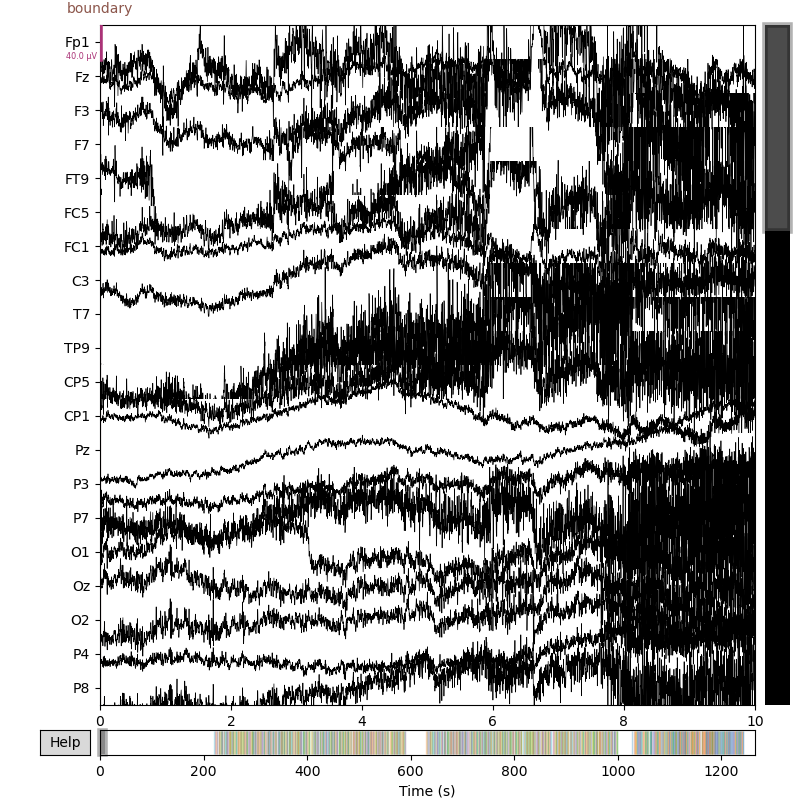

In [36]:
# plot raw data

#raw.plot()
mne.viz.plot_raw(subj3, show = False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>


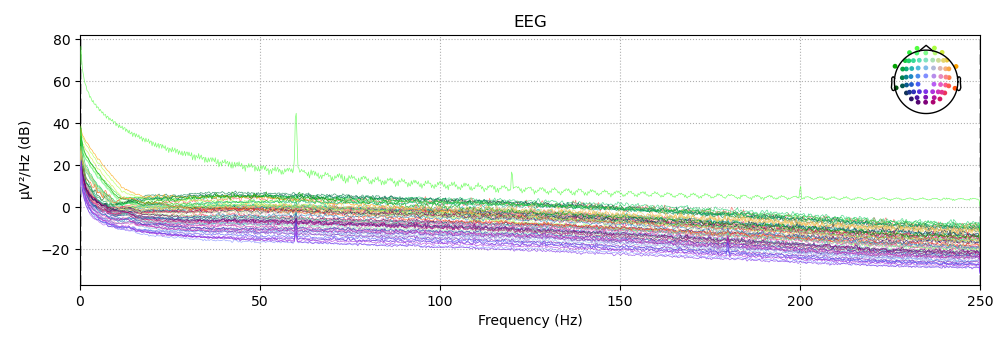

In [37]:
# plot power spectrum
subj3.plot_psd(show = False)

### Re-referencing Subject 3

In [38]:
# re-reference
subj3.set_eeg_reference(ref_channels = 'average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

<IPython.core.display.Javascript object>


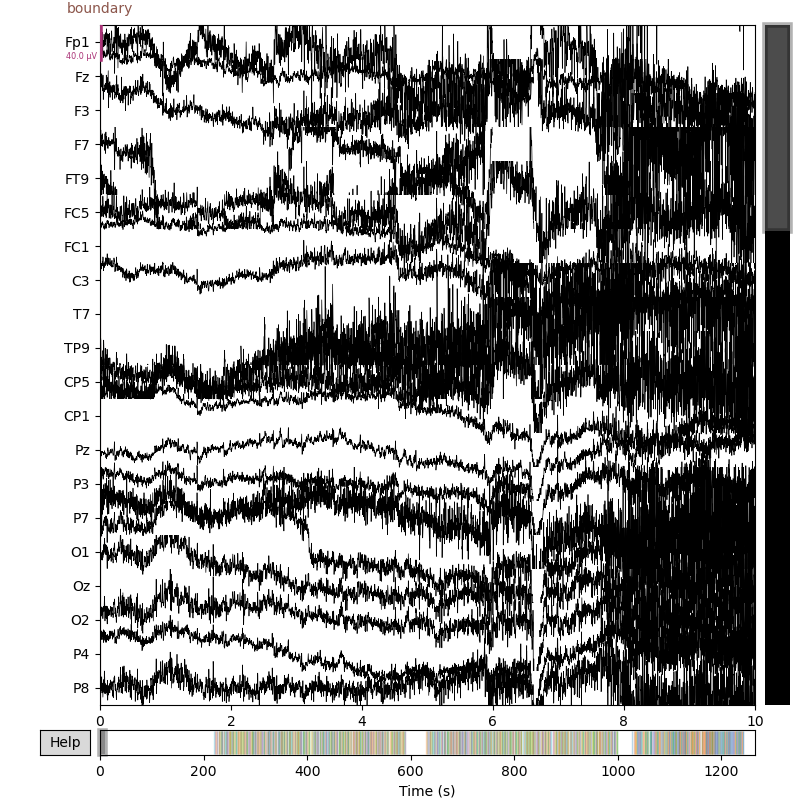

In [39]:
#raw.plot()
mne.viz.plot_raw(subj3, show = False)

### Filtering Subject 3

In [40]:
subj3 = subj3.filter(0.5, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.3s finished


<IPython.core.display.Javascript object>


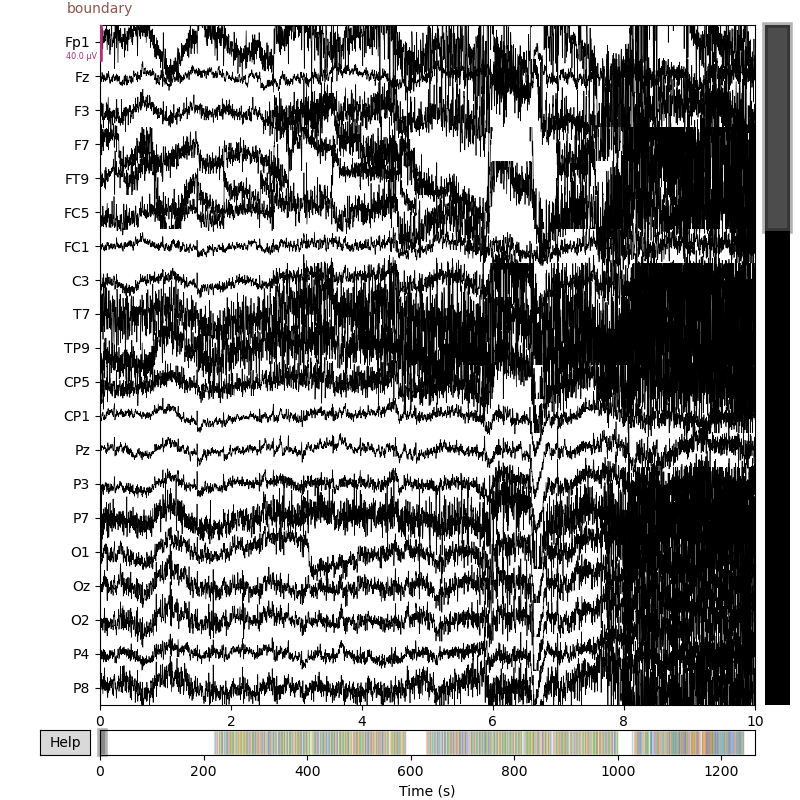

In [41]:
#raw.plot()
mne.viz.plot_raw(subj3, show = False)

## Subject 4 (Male/Sad Stimulus)

In [42]:
subj4 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)
df4 = subj4.to_data_frame()

Reading /home/cmcmanig/FINALPROJECT/sub-003-eeg-sub-003_task-PST_eeg.fdt
Reading 0 ... 632449  =      0.000 ...  1264.898 secs...


/tmp/ipykernel_4061/2611550600.py:1: RuntimeWarning: Data file name in EEG.data (sub-003_task-PST_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-003-eeg-sub-003_task-PST_eeg.fdt).
  subj4 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)
/tmp/ipykernel_4061/2611550600.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  subj4 = mne.io.read_raw_eeglab("sub-003-eeg-sub-003_task-PST_eeg.set", preload = True)


In [43]:
df4.head()

time           Fp1           Fz           F3           F7          FT9  \
0  0.000 -18541.210938 -7359.912109  4180.078125 -4352.392578  3167.919922   
1  0.002 -18543.945312 -7360.449219  4185.302734 -4356.933594  3170.800781   
2  0.004 -18547.656250 -7362.597656  4169.091797 -4358.154297  3168.212891   
3  0.006 -18545.019531 -7361.621094  4174.365234 -4349.218750  3173.144531   
4  0.008 -18540.332031 -7362.402344  4177.636719 -4345.605469  3167.382812   

          FC5          FC1            C3           T7  ...            C2  \
0 -785.253906  3898.681641  15846.289062 -6301.757812  ...  19704.101562   
1 -787.060547  3898.925781  15842.480469 -6300.244141  ...  19704.980469   
2 -792.871094  3899.658203  15838.085938 -6272.851562  ...  19705.615234   
3 -794.287109  3901.464844  15838.525391 -6263.720703  ...  19706.103516   
4 -796.142578  3900.781250  15837.841797 -6265.673828  ...  19704.638672   

          FC4          FT8           F6           F2          AF4  \
0  504.052734  4627.099609 -2538.330078  6395.556641 -2447.363281   
1  505.566406  4631.542969 -2535.888672  6397.607422 -2443.750000   
2  505.517578  4631.835937 -2537.011719  6396.533203 -2447.167969   
3  506.201172  4631.591797 -2535.498047  6398.291016 -2446.289062   
4  505.810547  4632.812500 -2533.691406  6397.216797 -2446.093750   

           AF8           EOG           EKG  AudioOutput  
0 -5677.246094  12338.757812 -343316.18750  1626.908813  
1 -5676.074219  12377.500977 -334857.09375  2858.936768  
2 -5676.123047  12331.903320 -334958.12500  2756.118652  
3 -5671.923828  12260.376953 -338972.21875  3007.352295  
4 -5669.433594  12275.875000 -352126.96875  2928.078125  

[5 rows x 67 columns]

#### Take a Look ar Recording Logistics

In [44]:
num_chan = subj4.info['nchan']
srate = subj4.info['sfreq']
num_time_pnts = subj4.n_times
duration = subj4.n_times / srate

print('Number of channels:', num_chan)
print('Sampling rate:', srate, "Hz")
print('Numer of time points:', num_time_pnts)
print('Duration:', duration, "seconds")

Number of channels: 66
Sampling rate: 500.0 Hz
Numer of time points: 632450
Duration: 1264.9 seconds


In [45]:
subj4.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

#### Take a Look at Channels and Change Type of non-EEG channels

In [46]:
# need to change channel type of non-EEG channels
subj4.info['ch_names']

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'EOG',
 'EKG',
 'AudioOutput']

In [47]:
channel_change = { 'EOG' : 'misc',
                   'EKG' : 'misc',
           'AudioOutput' : 'misc' }

subj4.set_channel_types(channel_change)

/tmp/ipykernel_4061/355149565.py:5: RuntimeWarning: The unit for channel(s) AudioOutput, EKG, EOG has changed from V to NA.
  subj4.set_channel_types(channel_change)


<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

In [48]:
subj4.set_montage('standard_1020', match_case = False)

<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

### Plot the Raw Data and Power Spectrum

<IPython.core.display.Javascript object>


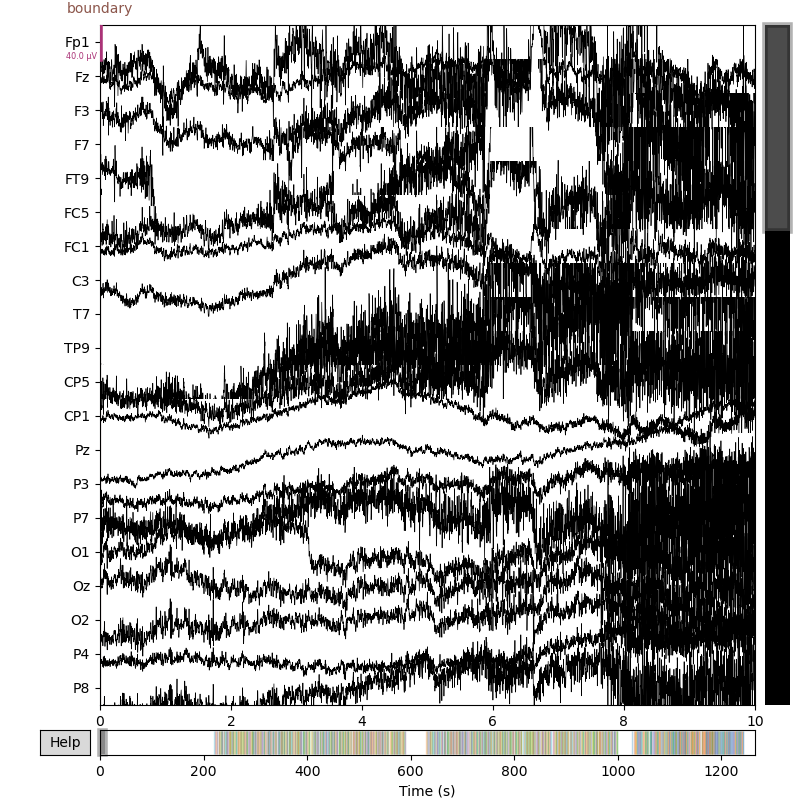

In [49]:
# plot raw data

#raw.plot()
mne.viz.plot_raw(subj4, show = False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


<IPython.core.display.Javascript object>


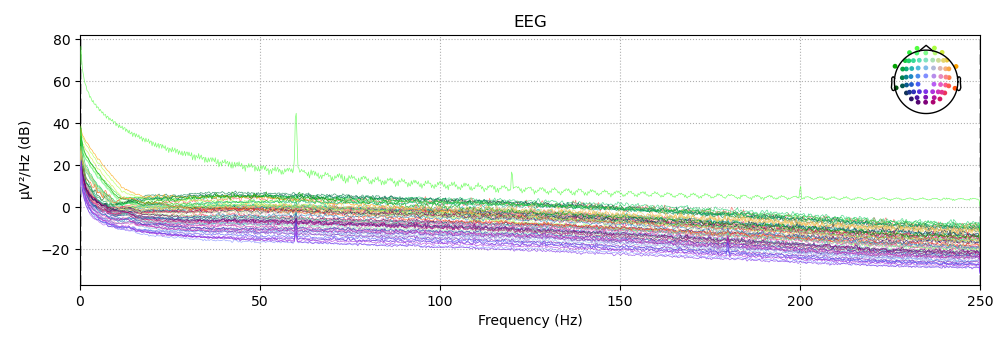

In [50]:
# plot power spectrum
subj4.plot_psd(show = False)

### Re-referencing Subject 4

In [51]:
# re-reference
subj4.set_eeg_reference(ref_channels = 'average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEEGLAB | sub-003-eeg-sub-003_task-PST_eeg.fdt, 66 x 632450 (1264.9 s), ~318.6 MB, data loaded>

<IPython.core.display.Javascript object>


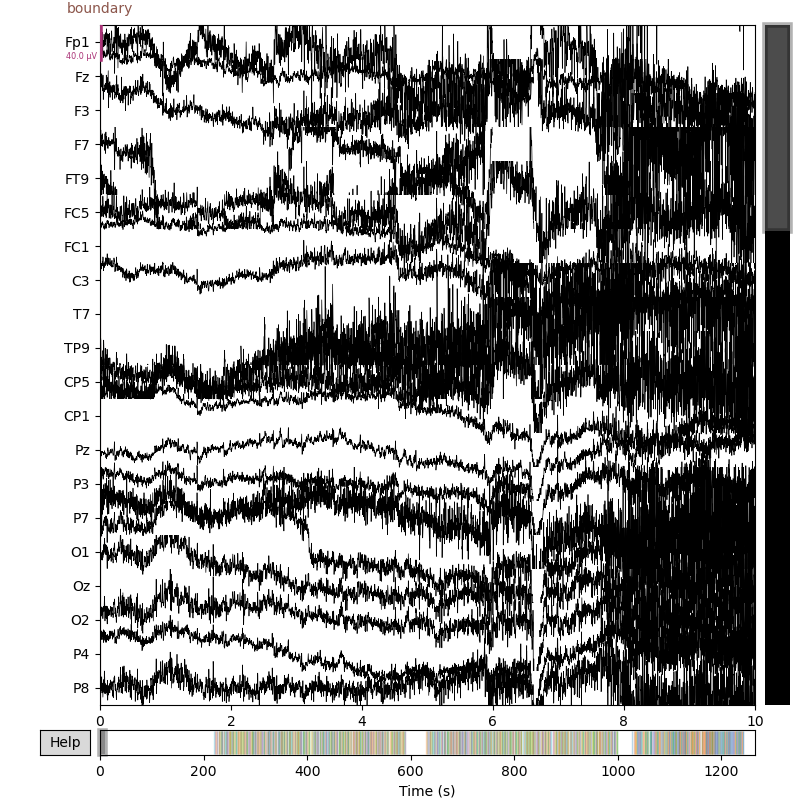

In [52]:
#raw.plot()
mne.viz.plot_raw(subj4, show = False)

### Filtering Subject 4

In [53]:
subj4 = subj4.filter(0.5, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.3s finished


<IPython.core.display.Javascript object>


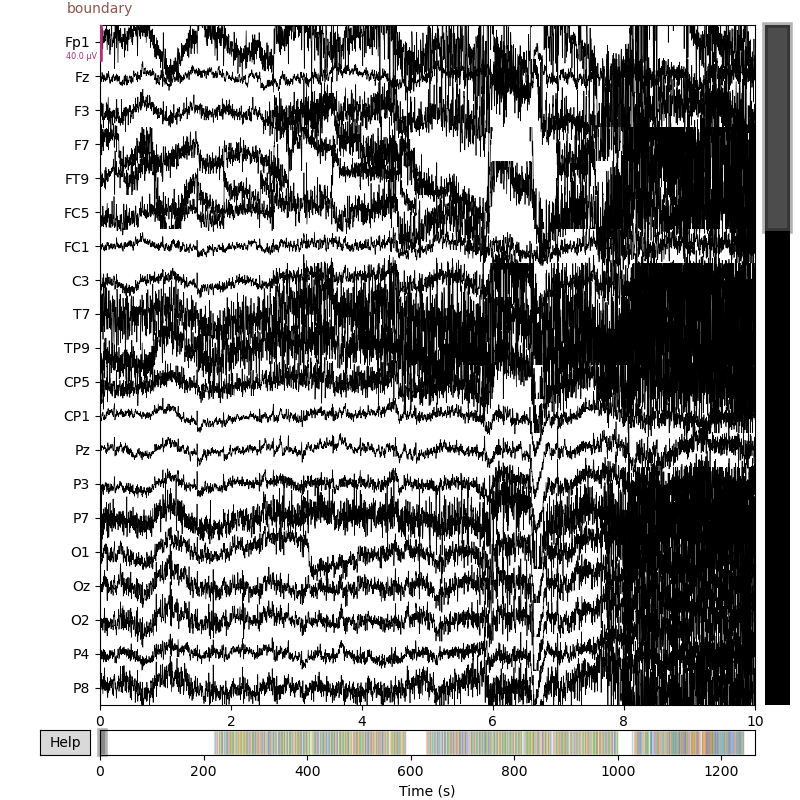

In [54]:
#raw.plot()
mne.viz.plot_raw(subj4, show = False)